# K-Means result: 

It seems bad

In [5]:
# K-means Classifier 
from utils.analysis import *
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from collections import defaultdict

# Read csv files and merge
filenames = ["datasets/AmItheAsshole.csv", "datasets/confessions.csv", "datasets/tifu.csv"]
dfs = [pd.read_csv(filename) for filename in filenames]
data = pd.concat(dfs, ignore_index=True)

# Split the text and the their labels
corpus_text = data['selftext'].fillna('')
corpus_labels = data['subreddit']

# Preprocess and text vectorize
preprocessed_corpus = [preprocess_text(doc) for doc in corpus_text]
vectorizer = TfidfVectorizer(min_df=2, stop_words='english')
X = vectorizer.fit_transform(preprocessed_corpus)

# K-means clustering
n_clusters = len(corpus_labels.unique())
kmeans = KMeans(n_clusters=5, random_state=42)    # When n_cluster = 5, it shows nearly optimal classification.
kmeans_labels = kmeans.fit_predict(X)

# Map cluster numbers to labels
cluster_label_counts = {}
for cluster_label, true_label in zip(kmeans_labels, corpus_labels):
    if cluster_label not in cluster_label_counts:
        cluster_label_counts[cluster_label] = {}
    if true_label not in cluster_label_counts[cluster_label]:
        cluster_label_counts[cluster_label][true_label] = 0
    cluster_label_counts[cluster_label][true_label] += 1

# Map clusters to majority labels
cluster_to_label = {
    cluster: max(counts.items(), key=lambda x: x[1])[0]
    for cluster, counts in cluster_label_counts.items()
}

# Convert cluster numbers to predicted labels
kmeans_pred = [cluster_to_label[label] for label in kmeans_labels]

print("\nK-means Clustering Results:")
print(classification_report(corpus_labels, kmeans_pred))



K-means Clustering Results:
               precision    recall  f1-score   support

AmItheAsshole       0.64      0.54      0.58       500
  confessions       0.65      0.56      0.60       500
         tifu       0.56      0.72      0.63       500

     accuracy                           0.61      1500
    macro avg       0.61      0.61      0.60      1500
 weighted avg       0.61      0.61      0.60      1500



## Demonstration of K-Means Clustering

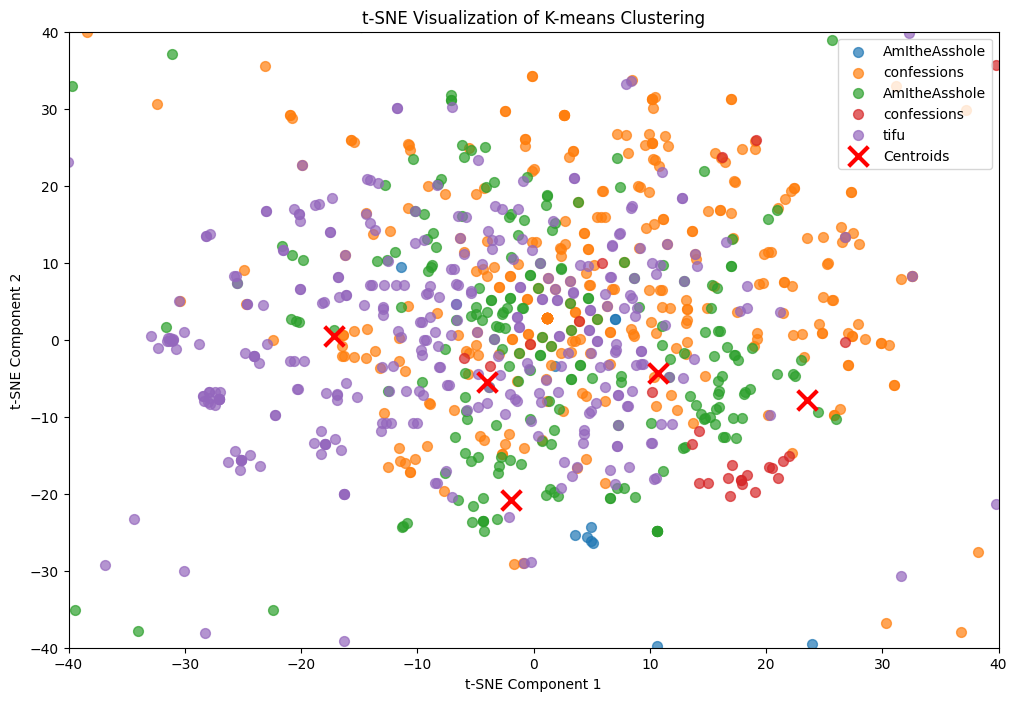

In [58]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(12, 8))

unique_labels = np.unique(kmeans_labels)

for label in unique_labels:
    subreddit_name = cluster_to_label[label]  
    plt.scatter(
        X_tsne[kmeans_labels == label, 0], 
        X_tsne[kmeans_labels == label, 1], 
        label=f'{subreddit_name}', 
        s=50, 
        alpha=0.7
    )

centers_2d = np.array([X_tsne[kmeans_labels == label].mean(axis=0) for label in unique_labels])
plt.scatter(
    centers_2d[:, 0], 
    centers_2d[:, 1], 
    c='red', 
    marker='x', 
    s=200, 
    linewidth=3, 
    label='Centroids'
)
plt.xlim(-40, 40)  
plt.ylim(-40, 40) 
plt.title("t-SNE Visualization of K-means Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


/var/folders/2b/c_5bbndx1zl1_7wqchywq1r00000gn/T/ipykernel_95941/2001828083.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(subreddits))
/var/folders/2b/c_5bbndx1zl1_7wqchywq1r00000gn/T/ipykernel_95941/2001828083.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


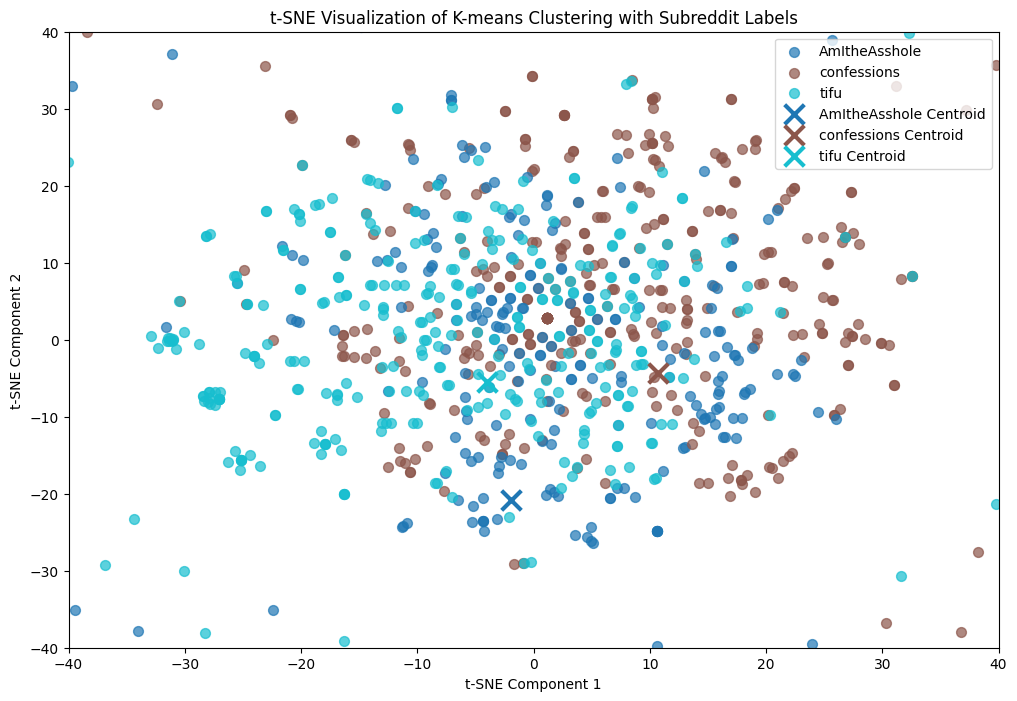

In [54]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(12, 8))

unique_labels = np.unique(kmeans_labels)
subreddits = list(set(cluster_to_label.values()))
colors = plt.cm.get_cmap('tab10', len(subreddits))

plotted_labels = set()
for label in unique_labels:
    subreddit_name = cluster_to_label[label]
    color_idx = subreddits.index(subreddit_name) 
    
    if subreddit_name not in plotted_labels:
        plt.scatter(
            X_tsne[kmeans_labels == label, 0], 
            X_tsne[kmeans_labels == label, 1], 
            label=subreddit_name, 
            color=[colors(color_idx)], 
            s=50, 
            alpha=0.7
        )
        plotted_labels.add(subreddit_name)
    else:
        plt.scatter(
            X_tsne[kmeans_labels == label, 0], 
            X_tsne[kmeans_labels == label, 1], 
            color=[colors(color_idx)], 
            s=50, 
            alpha=0.7
        )


centers_2d = np.array([X_tsne[kmeans_labels == label].mean(axis=0) for label in unique_labels])
for idx, subreddit_name in enumerate(subreddits):
    plt.scatter(
        centers_2d[idx, 0], 
        centers_2d[idx, 1], 
        c=colors(idx), 
        marker='x', 
        s=200, 
        linewidth=3, 
        label=f'{subreddit_name} Centroid'
    )
plt.xlim(-40, 40)  
plt.ylim(-40, 40) 
plt.title("t-SNE Visualization of K-means Clustering with Subreddit Labels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


/var/folders/2b/c_5bbndx1zl1_7wqchywq1r00000gn/T/ipykernel_95941/2975976509.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


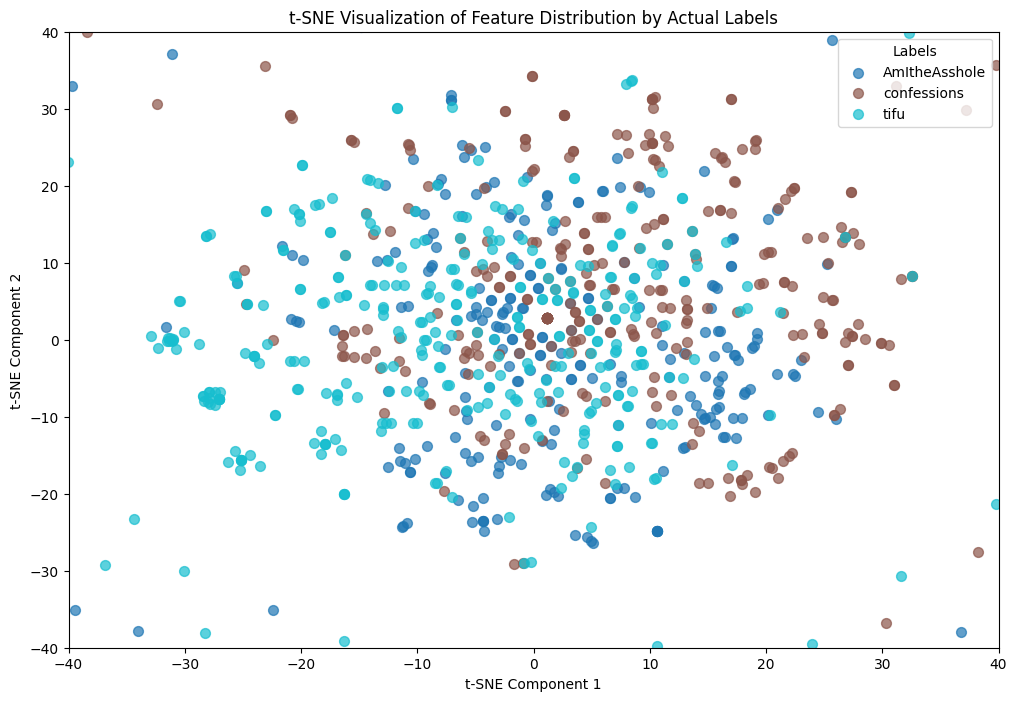

In [59]:
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(X.toarray())

plt.figure(figsize=(12, 8))
unique_labels = corpus_labels.unique()
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    idx = corpus_labels == label
    plt.scatter(reduced_vectors[idx, 0], reduced_vectors[idx, 1], 
                label=label, s=50, alpha=0.7, c=[colors(i)], marker='o')
plt.xlim(-40, 40)  
plt.ylim(-40, 40) 
plt.title("t-SNE Visualization of Feature Distribution by Actual Labels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Labels")
plt.show()

In [ ]:
terms = vectorizer.get_feature_names_out()
for i in range(5):
    center_terms = kmeans.cluster_centers_[i].argsort()[-10:] 
    print(f"Cluster {i} center terms: {[terms[ind] for ind in center_terms]}")


Cluster 0 center terms: ['like', 'white', 'leave', 'know', 'says', 'come', 'let', 'cash', 'title', 'just']
Cluster 1 center terms: ['know', 've', 'said', 'day', 'work', 'didn', 'time', 'got', 'like', 'just']
Cluster 2 center terms: ['love', 'think', 'life', 've', 'know', 'want', 'just', 'feel', 'don', 'like']
Cluster 3 center terms: ['time', 'got', 'know', 'didn', 'told', 'just', 'like', 'said', 'friends', 'friend']
Cluster 4 center terms: ['wife', 'just', 'said', 'told', 'parents', 'brother', 'sister', 'family', 'dad', 'mom']


## K-Means used to classify two categories seperately

In [16]:
# K-means Classifier 
from utils.analysis import *
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from collections import defaultdict

# Read csv files and merge
filenames = ["datasets/AmItheAsshole.csv", "datasets/confessions.csv"]
dfs = [pd.read_csv(filename) for filename in filenames]
data = pd.concat(dfs, ignore_index=True)

# Split the text and the their labels
corpus_text = data['selftext'].fillna('') 
corpus_labels = data['subreddit']

# Preprocess and text vectorize
preprocessed_corpus = [preprocess_text(doc) for doc in corpus_text]
vectorizer = TfidfVectorizer(min_df=2, stop_words='english')
X = vectorizer.fit_transform(corpus_text)

# K-means clustering
n_clusters = len(corpus_labels.unique())
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Map cluster numbers to labels
cluster_label_counts = {}
for cluster_label, true_label in zip(kmeans_labels, corpus_labels):
    if cluster_label not in cluster_label_counts:
        cluster_label_counts[cluster_label] = {}
    if true_label not in cluster_label_counts[cluster_label]:
        cluster_label_counts[cluster_label][true_label] = 0
    cluster_label_counts[cluster_label][true_label] += 1

# Map clusters to majority labels
cluster_to_label = {
    cluster: max(counts.items(), key=lambda x: x[1])[0]
    for cluster, counts in cluster_label_counts.items()
}

# Convert cluster numbers to predicted labels
kmeans_pred = [cluster_to_label[label] for label in kmeans_labels]

print("\nK-means Clustering Results:")
print(classification_report(corpus_labels, kmeans_pred))



K-means Clustering Results:
               precision    recall  f1-score   support

AmItheAsshole       0.56      0.70      0.62       500
  confessions       0.60      0.45      0.51       500

     accuracy                           0.57      1000
    macro avg       0.58      0.57      0.57      1000
 weighted avg       0.58      0.57      0.57      1000



In [17]:
# K-means Classifier 
from utils.analysis import *
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from collections import defaultdict

# Read csv files and merge
filenames = ["datasets/AmItheAsshole.csv", "datasets/tifu.csv"]
dfs = [pd.read_csv(filename) for filename in filenames]
data = pd.concat(dfs, ignore_index=True)

# Split the text and the their labels
corpus_text = data['selftext'].fillna('') 
corpus_labels = data['subreddit']

# Preprocess and text vectorize
preprocessed_corpus = [preprocess_text(doc) for doc in corpus_text]
vectorizer = TfidfVectorizer(min_df=2, stop_words='english')
X = vectorizer.fit_transform(corpus_text)

# K-means clustering
n_clusters = len(corpus_labels.unique())
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Map cluster numbers to labels
cluster_label_counts = {}
for cluster_label, true_label in zip(kmeans_labels, corpus_labels):
    if cluster_label not in cluster_label_counts:
        cluster_label_counts[cluster_label] = {}
    if true_label not in cluster_label_counts[cluster_label]:
        cluster_label_counts[cluster_label][true_label] = 0
    cluster_label_counts[cluster_label][true_label] += 1

# Map clusters to majority labels
cluster_to_label = {
    cluster: max(counts.items(), key=lambda x: x[1])[0]
    for cluster, counts in cluster_label_counts.items()
}

# Convert cluster numbers to predicted labels
kmeans_pred = [cluster_to_label[label] for label in kmeans_labels]

print("\nK-means Clustering Results:")
print(classification_report(corpus_labels, kmeans_pred))



K-means Clustering Results:
               precision    recall  f1-score   support

AmItheAsshole       0.87      0.50      0.64       500
         tifu       0.65      0.93      0.76       500

     accuracy                           0.71      1000
    macro avg       0.76      0.71      0.70      1000
 weighted avg       0.76      0.71      0.70      1000



In [18]:
# K-means Classifier 
from utils.analysis import *
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from collections import defaultdict

# Read csv files and merge
filenames = ["datasets/confessions.csv", "datasets/tifu.csv"]
dfs = [pd.read_csv(filename) for filename in filenames]
data = pd.concat(dfs, ignore_index=True)

# Split the text and the their labels
corpus_text = data['selftext'].fillna('') 
corpus_labels = data['subreddit']

# Preprocess and text vectorize
preprocessed_corpus = [preprocess_text(doc) for doc in corpus_text]
vectorizer = TfidfVectorizer(min_df=2, stop_words='english')
X = vectorizer.fit_transform(corpus_text)

# K-means clustering
n_clusters = len(corpus_labels.unique())
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Map cluster numbers to labels
cluster_label_counts = {}
for cluster_label, true_label in zip(kmeans_labels, corpus_labels):
    if cluster_label not in cluster_label_counts:
        cluster_label_counts[cluster_label] = {}
    if true_label not in cluster_label_counts[cluster_label]:
        cluster_label_counts[cluster_label][true_label] = 0
    cluster_label_counts[cluster_label][true_label] += 1

# Map clusters to majority labels
cluster_to_label = {
    cluster: max(counts.items(), key=lambda x: x[1])[0]
    for cluster, counts in cluster_label_counts.items()
}

# Convert cluster numbers to predicted labels
kmeans_pred = [cluster_to_label[label] for label in kmeans_labels]

print("\nK-means Clustering Results:")
print(classification_report(corpus_labels, kmeans_pred))



K-means Clustering Results:
              precision    recall  f1-score   support

 confessions       0.73      0.52      0.60       500
        tifu       0.63      0.81      0.71       500

    accuracy                           0.66      1000
   macro avg       0.68      0.66      0.65      1000
weighted avg       0.68      0.66      0.65      1000



K-Meams result between AITA and Confessions

| Label           | Precision | Recall | F1-Score | Support |
|-----------------|-----------|--------|----------|---------|
| AmItheAsshole   | 0.56      | 0.70   | 0.62     | 500     |
| Confessions     | 0.60      | 0.45   | 0.51     | 500     |
| **Accuracy**    |           |        | **0.57** | 1000    |
| **Macro Avg**   | 0.58      | 0.57   | 0.57     | 1000    |
| **Weighted Avg**| 0.58      | 0.57   | 0.57     | 1000    |

---
K-Meams result between Confessions and TIFU

| Label           | Precision | Recall | F1-Score | Support |
|-----------------|-----------|--------|----------|---------|
| Confessions     | 0.73      | 0.52   | 0.60     | 500     |
| TIFU            | 0.63      | 0.81   | 0.71     | 500     |
| **Accuracy**    |           |        | **0.66** | 1000    |
| **Macro Avg**   | 0.68      | 0.66   | 0.65     | 1000    |
| **Weighted Avg**| 0.68      | 0.66   | 0.65     | 1000    |

---

K-Meams result between AITA and TIFU

| Label           | Precision | Recall | F1-Score | Support |
|-----------------|-----------|--------|----------|---------|
| AmItheAsshole   | 0.87      | 0.50   | 0.64     | 500     |
| TIFU            | 0.65      | 0.93   | 0.76     | 500     |
| **Accuracy**    |           |        | **0.71** | 1000    |
| **Macro Avg**   | 0.76      | 0.71   | 0.70     | 1000    |
| **Weighted Avg**| 0.76      | 0.71   | 0.70     | 1000    |


# Naive Bayes results:

Much better than K-Means

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Preprocess text
preprocessed_corpus = [preprocess_text(doc) for doc in corpus_text]

vectorizer = TfidfVectorizer(min_df=2, stop_words='english')
X = vectorizer.fit_transform(corpus_text)

# Split data for NBC
X_train, X_test, y_train, y_test = train_test_split(
    X, corpus_labels, test_size=0.3, random_state=42
)

# Naive Bayes Classification
nbc = MultinomialNB()
nbc.fit(X_train, y_train)
nbc_pred = nbc.predict(X_test)

# Analyze results
print("Naive Bayes Classification Results:")
print(classification_report(y_test, nbc_pred))

Naive Bayes Classification Results:
               precision    recall  f1-score   support

AmItheAsshole       0.67      0.95      0.79       148
  confessions       0.92      0.66      0.77       141
         tifu       0.84      0.73      0.78       161

     accuracy                           0.78       450
    macro avg       0.81      0.78      0.78       450
 weighted avg       0.81      0.78      0.78       450



In [ ]:
# Report most informative features
def most_informative_features(vectorizer, classifier, n=10):
    feature_names = vectorizer.get_feature_names_out()
    class_labels = classifier.classes_
    top_features = {}

    for i, class_label in enumerate(class_labels):
        top_indices = classifier.feature_log_prob_[i].argsort()[-n:][::-1]
        top_features[class_label] = [(feature_names[j], classifier.feature_log_prob_[i][j]) for j in top_indices]

    return top_features

top_features = most_informative_features(vectorizer, nbc, n=15)
print("\nTop Features per Class:")
for class_label, features in top_features.items():
    print(f"\nClass: {class_label}")
    for feature, log_prob in features:
        print(f"  {feature}: {np.exp(log_prob):.4f}")


Top Features per Class:

Class: AmItheAsshole
  said: 0.0013
  told: 0.0012
  just: 0.0011
  like: 0.0011
  don: 0.0011
  mom: 0.0010
  friend: 0.0010
  want: 0.0009
  time: 0.0009
  didn: 0.0009
  dad: 0.0009
  friends: 0.0009
  family: 0.0009
  got: 0.0009
  know: 0.0008

Class: confessions
  like: 0.0015
  just: 0.0014
  feel: 0.0011
  know: 0.0011
  don: 0.0011
  life: 0.0009
  want: 0.0009
  ve: 0.0009
  think: 0.0008
  time: 0.0008
  love: 0.0008
  really: 0.0007
  people: 0.0007
  day: 0.0007
  years: 0.0006

Class: tifu
  just: 0.0011
  like: 0.0010
  tl: 0.0009
  dr: 0.0009
  didn: 0.0008
  got: 0.0008
  time: 0.0008
  know: 0.0007
  ve: 0.0007
  don: 0.0007
  went: 0.0007
  did: 0.0007
  said: 0.0007
  thought: 0.0007
  going: 0.0007


# Try to use emotion score vectorization for K-Means

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from utils.analysis import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


filenames = ["datasets/AmItheAsshole.csv", "datasets/confessions.csv", "datasets/tifu.csv"]
dfs = [pd.read_csv(filename) for filename in filenames]
data = pd.concat(dfs, ignore_index=True)

corpus_text = data['selftext'].fillna('') 
corpus_labels = data['subreddit']

preprocessed_corpus = [preprocess_text(doc) for doc in corpus_text]

nrc_lexicon = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep='\t', 
                          names=["word", "emotion", "association"])

emotion_dict = defaultdict(list)
for _, row in nrc_lexicon.iterrows():
    if row['association'] == 1:
        emotion_dict[row['word']].append(row['emotion'])


emotions = sorted(set(nrc_lexicon['emotion']))
emotion_vectors = []

for text in preprocessed_corpus:
    emotion_scores = {emotion: 0 for emotion in emotions}
    words = text.lower().split()
    for word in words:
        if word in emotion_dict:
            for emotion in emotion_dict[word]:
                emotion_scores[emotion] += 1
    emotion_vectors.append([emotion_scores[emotion] for emotion in emotions])


emotion_vectors_df = pd.DataFrame(emotion_vectors, columns=emotions)
scaler = StandardScaler()
X = scaler.fit_transform(emotion_vectors_df)

n_clusters = len(corpus_labels.unique())  
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


# Map cluster numbers to labels
cluster_label_counts = {}
for cluster_label, true_label in zip(kmeans_labels, corpus_labels):
    if cluster_label not in cluster_label_counts:
        cluster_label_counts[cluster_label] = {}
    if true_label not in cluster_label_counts[cluster_label]:
        cluster_label_counts[cluster_label][true_label] = 0
    cluster_label_counts[cluster_label][true_label] += 1

# Map clusters to majority labels
cluster_to_label = {
    cluster: max(counts.items(), key=lambda x: x[1])[0]
    for cluster, counts in cluster_label_counts.items()
}

# Convert cluster numbers to predicted labels
kmeans_pred = [cluster_to_label[label] for label in kmeans_labels]

# Output the report
print("\nK-means Clustering Results (using Emotion Score Vectorization):")
print(classification_report(corpus_labels, kmeans_pred))



K-means Clustering Results (using Emotion Score Vectorization):
               precision    recall  f1-score   support

AmItheAsshole       0.47      0.63      0.54       500
  confessions       0.52      0.65      0.58       500
         tifu       0.46      0.20      0.28       500

     accuracy                           0.49      1500
    macro avg       0.49      0.49      0.47      1500
 weighted avg       0.49      0.49      0.47      1500



Even worse than tf-idf vectorization

In [ ]:
terms = vectorizer.get_feature_names_out()
for i in range(5):
    center_terms = kmeans.cluster_centers_[i].argsort()[-10:] 
    print(f"Cluster {i} center terms: {[terms[ind] for ind in center_terms]}")


Cluster 0 center terms: ['like', 'white', 'leave', 'know', 'says', 'come', 'let', 'cash', 'title', 'just']
Cluster 1 center terms: ['know', 've', 'said', 'day', 'work', 'didn', 'time', 'got', 'like', 'just']
Cluster 2 center terms: ['love', 'think', 'life', 've', 'know', 'want', 'just', 'feel', 'don', 'like']
Cluster 3 center terms: ['time', 'got', 'know', 'didn', 'told', 'just', 'like', 'said', 'friends', 'friend']
Cluster 4 center terms: ['wife', 'just', 'said', 'told', 'parents', 'brother', 'sister', 'family', 'dad', 'mom']


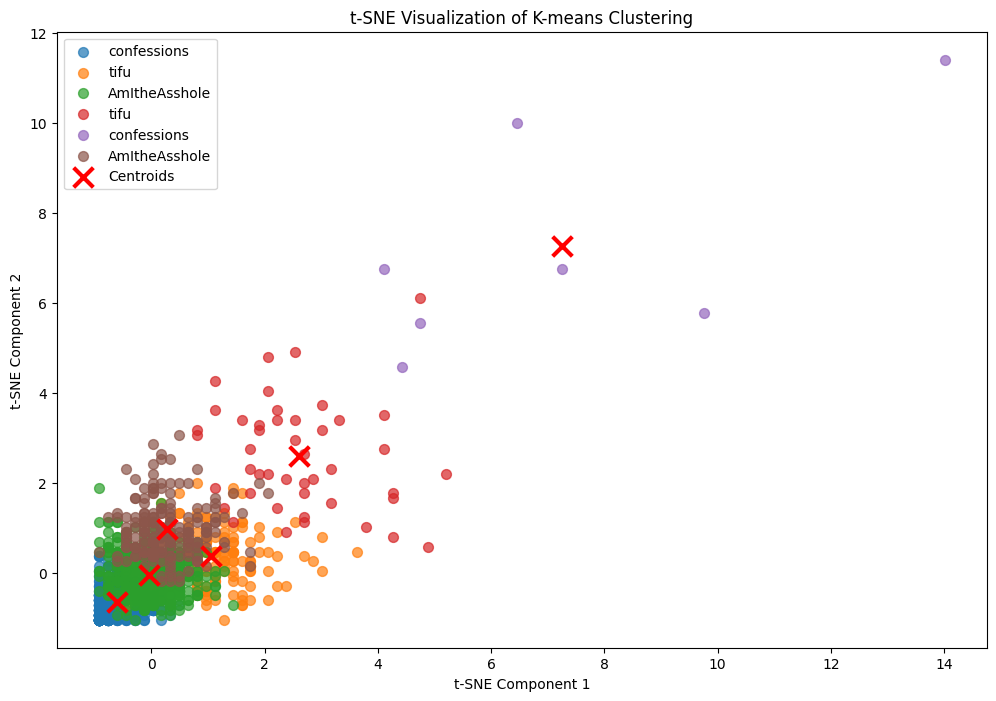

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=42)

plt.figure(figsize=(12, 8))

unique_labels = np.unique(kmeans_labels)

for label in unique_labels:
    subreddit_name = cluster_to_label[label]  
    plt.scatter(
        X[kmeans_labels == label, 0], 
        X[kmeans_labels == label, 1], 
        label=f'{subreddit_name}', 
        s=50, 
        alpha=0.7
    )

centers_2d = np.array([X[kmeans_labels == label].mean(axis=0) for label in unique_labels])
plt.scatter(
    centers_2d[:, 0], 
    centers_2d[:, 1], 
    c='red', 
    marker='x', 
    s=200, 
    linewidth=3, 
    label='Centroids'
)

plt.title("t-SNE Visualization of K-means Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()
